# Sources of data:

Prices:

https://pypi.org/project/yfinance/

https://www.kaggle.com/mattiuzc/commodity-correlations/notebook

Conversao de precos e uni:
https://www.cmegroup.com/pt/education/files/commodities-metric-conversion-guide.pdf

# Set-up libraries and install yfinance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries to be imported
import yfinance as yf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import os

# Prices upload example from yfinance

In [3]:
# Using yfinance to retrieve data
# soybean_ticker = 'ZS=F'
# soybean_futures_prices = 'zsf'

zsf = yf.Ticker("ZS=F")

# get stock info
zsf.info

# get historical market data
hist_F = zsf.history(period="max")

In [4]:
hist_F

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-15,491.00,493.75,490.00,493.75,445,0,0
2000-09-18,483.25,486.00,482.50,484.00,382,0,0
2000-09-19,485.00,485.50,483.50,484.25,325,0,0
2000-09-20,483.50,484.25,483.25,483.25,321,0,0
2000-09-21,486.75,488.00,486.00,486.50,330,0,0
...,...,...,...,...,...,...,...
2022-03-14,1708.00,1710.00,1687.25,1687.25,73458,0,0
2022-03-15,1674.00,1674.00,1638.00,1658.75,70449,0,0
2022-03-16,1661.00,1681.25,1645.25,1649.25,65232,0,0


In [21]:
# Using yfinance to retrieve data
# soybean_ticker = 'ZS=F'
# soybean_futures_prices = 'zsf'

brl = yf.Ticker("BRL=X")

# get stock info
brl.info

# get historical market data
hist_F = brl.history(period="max")
hist_F

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01,2.9460,2.9460,2.923000,2.923000,0,0,0
2003-12-02,2.9230,2.9310,2.923000,2.931000,0,0,0
2003-12-03,2.9310,2.9360,2.926000,2.931000,0,0,0
2003-12-04,2.9310,2.9430,2.931000,2.943000,0,0,0
2003-12-05,2.9430,2.9480,2.934000,2.934000,0,0,0
...,...,...,...,...,...,...,...
2022-03-14,5.0731,5.0838,5.037000,5.073500,0,0,0
2022-03-15,5.1217,5.1495,5.089902,5.121400,0,0,0
2022-03-16,5.1632,5.1637,5.095000,5.163200,0,0,0


## Closing prices for soybean, soyOil and soyMeal

### Code to extract commodity closing prices

In [6]:
# Using os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
# Variables of soybeans and soy sub-products

soyMeal = yf.Ticker('ZM=F')
soyOil = yf.Ticker('ZL=F')
soybean = yf.Ticker('ZS=F')

In [8]:
soyMeal = soyMeal.history(period="max")
soyOil = soyOil.history(period="max")
soybean = soybean.history(period="max")

In [9]:
# Lists I use for manipulating the dataframe for each commodity
commodities = [soyMeal, soyOil, soybean]
commodityName = ['soyMeal', 'soyOil', 'soybean']

In [10]:
# Drop all columns except date and close price, rename close price to name of the commodity
col2drop = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits']
count = 0

for i in commodities:
    i.drop(columns = col2drop, axis = 0, inplace = True)
    i.columns = [commodityName[count]]
    count += 1

In [11]:
# Join all data frames into one
df = pd.concat(commodities, join='outer', axis=1)

In [12]:
# Some prices are missing for things like holidays, use forward fill to make the missing values the same as the previous
df.ffill()
df.dropna()

,soyMeal,soyOil,soybean
Date,,,
2000-09-20,167.800003,15.270000,483.25
2000-09-21,170.800003,15.360000,486.50
2000-10-03,172.699997,15.300000,488.50
2000-10-09,167.399994,15.120000,484.50
2000-10-10,168.800003,15.180000,483.00
...,...,...,...
2022-03-14,521.900024,78.730003,1687.25
2022-03-15,484.000000,73.680000,1658.75
2022-03-16,478.000000,73.550003,1649.25


### Graphs for the closing commodity prices

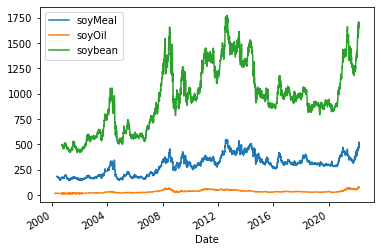

In [23]:
# plt.plot(df)
df.plot()
plt.show()

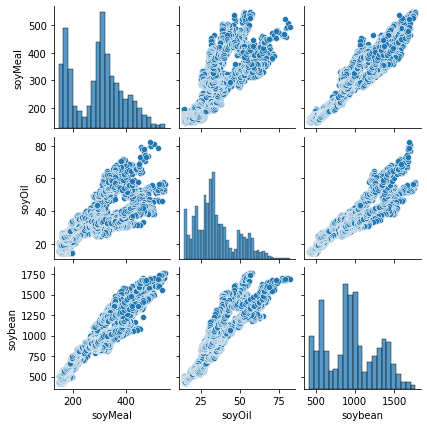

In [14]:
sns.pairplot(df, height=2)

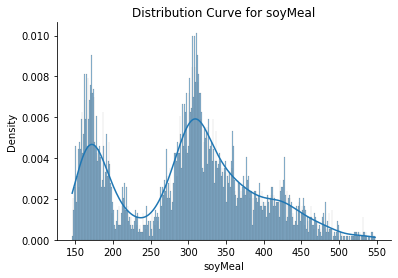

In [15]:
def plot_dist(series=df["soyMeal"], title="Distribution Curve for soyMeal"):
    sns.histplot(series, kde=True, stat='density', discrete=True)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

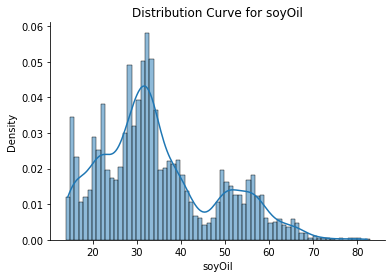

In [16]:
plot_dist(df["soyOil"], title="Distribution Curve for soyOil")

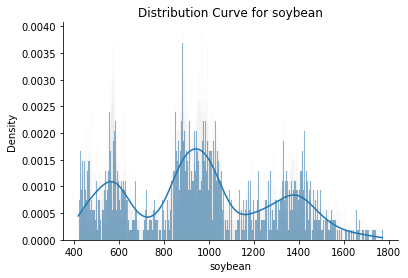

In [17]:
plot_dist(df["soybean"], title="Distribution Curve for soybean")

<AxesSubplot:>

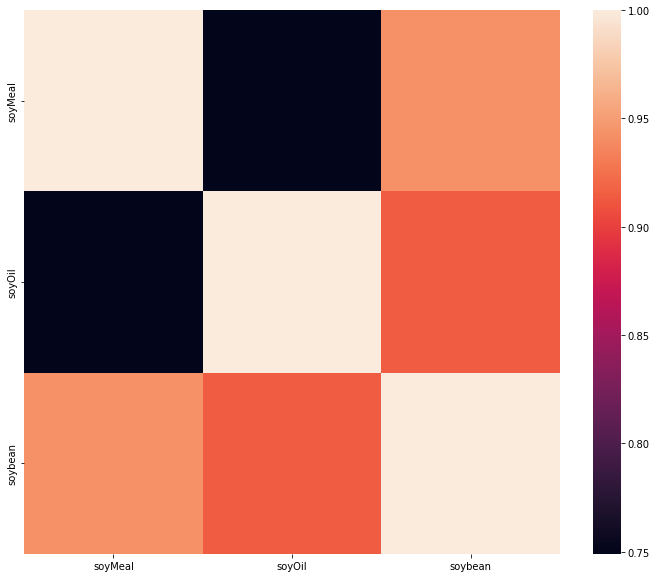

In [18]:
correlations = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations)

### Conversao de unidades

In [19]:
# soybean futures price  = U.S. cents per bushel
# soybean futures lot = 5,000 bushels (~136 metric tons)

In [20]:
price (US cent/bushel) = 1671.75

SyntaxError: invalid syntax (2779234164.py, line 1)

In [ ]:
# 1 lot = 136mt

us_price = 1671/100
us_price

In [ ]:
us_price_bushel = us_price*5000
us_price_bushel

In [ ]:
us_mt = us_price_bushel/136.08
us_mt

In [ ]:
# Soja:
# Preço por bushel x 36,7437 = preço por tonelada métrica
# Preço por tonelada métrica x 0,0272155 = preço por bushel

In [ ]:
#Farelo de soja:
# Preço por tonelada curta x 1,102311 = preço por tonelada métrica
# Preço por tonelada métrica x 0,907185 = preço por tonelada curta

In [ ]:
# Oleo de soja
# Preço por libra x 2204,623 = preço por tonelada métrica
# Preço por tonelada métrica x 0,0004536 = preço por libra

In [ ]:
# 15 monthly contracts of Jan, Mar, May, Aug, Sep and 8 monthly contracts of Jul and Nov
# listed annually after the termination of trading in the November contract of the current year.